<a href="https://colab.research.google.com/github/lol-chang/data-analisys-prorgamming/blob/main/final_project_202014420.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **기말 프로젝트 소개** - 202014420 이창진



어떤 주식에 투자해야 할까?

고민을 많이 해봤지만, 막상 무엇을 보고 투자해야 할지 모르고 조언만 듣고 판단했습니다.

학습한 데이터 분석 프로그래밍을 통해

방대한 주식 관련 데이터를 직접 분석해서 배당주로서 탁월한 주식을 발견하고자 프로젝트를 수행해보았습니다.

이 프로젝트에서는 주식 시장에서 안정적인 투자를 위해 배당주를 제공하는 기업을 중심으로 삼았습니다.

이를 위해 Samsung, SK, LG 세 기업의 주식 데이터를 활용하여, 특히 주가 예측 및 시각화를 중점으로 분석하였습니다.



# ** 주식 데이터 준비**

In [101]:
#주식 데이터를 야후 파이낸스 다운로드 받기 위해서 라이브러리 설치
!pip install yfinance

In [139]:
import pandas as pd
import yfinance as yf

#  [종목]   : [종목 코드]
# 삼성전자   : 005930
# SK하이닉스 : 000660
# LG화학    : 051910

# 주가 데이터 다운로드
SAMSUNG = yf.download('005930.KS', start = '2023-01-01', end='2023-12-20')

SK = yf.download('000660.KS', start = '2023-01-01', end='2023-12-20')

LG = yf.download('051910.KS', start = '2023-01-01', end='2023-12-20')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


---

# **데이터 프레임 형태 확인**


In [103]:
print(SAMSUNG.columns)
print("============================================================")
print(SAMSUNG.dtypes)
print("============================================================")
print(SAMSUNG.info())

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 239 entries, 2023-01-02 to 2023-12-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       239 non-null    float64
 1   High       239 non-null    float64
 2   Low        239 non-null    float64
 3   Close      239 non-null    float64
 4   Adj Close  239 non-null    float64
 5   Volume     239 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.1 KB
None


In [104]:
print("\n삼성 주식")
SAMSUNG.iloc[0:8:1]


삼성 주식


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,55500.0,56100.0,55200.0,55500.0,54906.453125,10031448
2023-01-03,55400.0,56000.0,54500.0,55400.0,54807.519531,13547030
2023-01-04,55700.0,58000.0,55600.0,57800.0,57181.851562,20188071
2023-01-05,58200.0,58800.0,57600.0,58200.0,57577.574219,15682826
2023-01-06,58300.0,59400.0,57900.0,59000.0,58369.019531,17334989
2023-01-09,59700.0,60700.0,59600.0,60700.0,60050.835938,18640107
2023-01-10,60200.0,61100.0,59900.0,60400.0,59754.046875,14859797
2023-01-11,61000.0,61200.0,60300.0,60500.0,59852.980469,12310751


In [105]:
print("LG화학 주식")
LG.iloc[0:8:1]

LG화학 주식


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,596000.0,620000.0,596000.0,604000.0,604000.0,108253
2023-01-03,605000.0,610000.0,599000.0,601000.0,601000.0,112173
2023-01-04,594000.0,608000.0,586000.0,601000.0,601000.0,129672
2023-01-05,603000.0,609000.0,580000.0,581000.0,581000.0,190445
2023-01-06,581000.0,598000.0,575000.0,594000.0,594000.0,135877
2023-01-09,599000.0,627000.0,589000.0,624000.0,624000.0,187189
2023-01-10,632000.0,647000.0,628000.0,629000.0,629000.0,217651
2023-01-11,631000.0,642000.0,622000.0,634000.0,634000.0,130042


In [106]:
print("SK 주식")
SK.iloc[0:8:1]

SK 주식


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,75100.0,76700.0,75000.0,75700.0,75240.664062,1376985
2023-01-03,75600.0,76300.0,73100.0,75600.0,75141.265625,2719437
2023-01-04,75400.0,81900.0,75200.0,81000.0,80508.500000,5154609
2023-01-05,83300.0,83300.0,80800.0,81400.0,80906.070312,3510964
2023-01-06,81400.0,83600.0,81100.0,83100.0,82595.757812,3687430
2023-01-09,84900.0,86000.0,83500.0,86000.0,85478.164062,3948670
2023-01-10,85500.0,87200.0,85000.0,86500.0,85975.132812,3105311
2023-01-11,87800.0,88400.0,86500.0,87300.0,86770.273438,3083961




---
# 주식 데이터 시각화 (그래프 그리기)


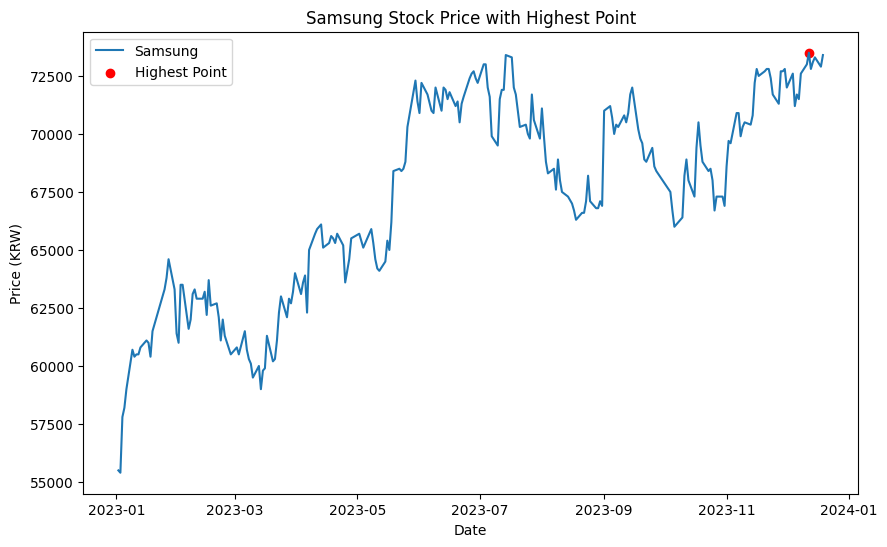


2023년 삼성전자 최고점 - 날짜:  2023-12-12 00:00:00  금액:  73500.0


In [107]:
import matplotlib.pyplot as plt

# 최고점 찾기
max_price_ss = SAMSUNG['Close'].max()
max_date_ss = SAMSUNG['Close'].idxmax()

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 삼성 주식 가격 그래프(최고점 표시)
plt.plot(SAMSUNG['Close'], label='Samsung')
plt.scatter(max_date_ss, max_price_ss, color='red', label='Highest Point')
plt.title('Samsung Stock Price with Highest Point')
plt.xlabel('Date')
plt.ylabel('Price (KRW)')
plt.legend()
plt.show()

print("\n2023년 삼성전자 최고점 - 날짜: ", max_date_ss, " 금액: ", max_price_ss)

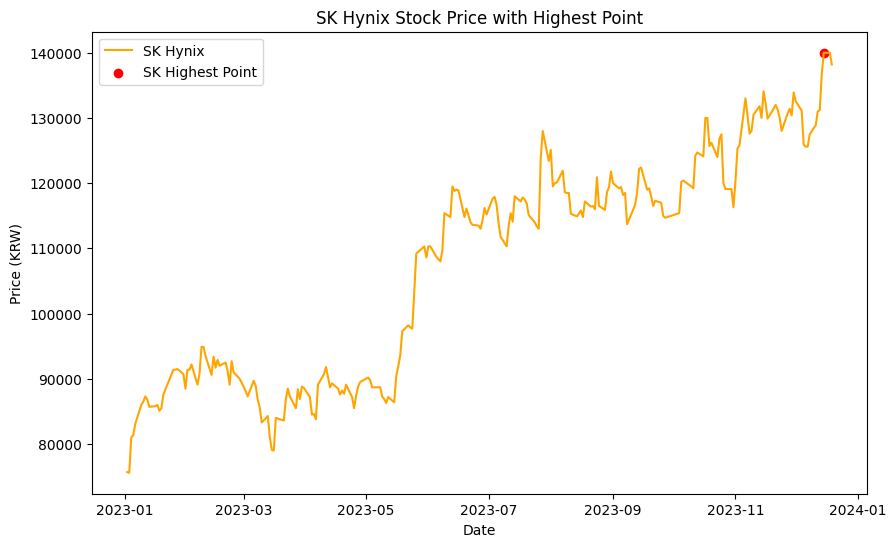


2023년 SK하이닉스 최고점 - 날짜:  2023-12-15 00:00:00  금액:  140000.0


In [108]:
max_price_sk = SK['Close'].max()
max_date_sk = SK['Close'].idxmax()

plt.figure(figsize=(10, 6))

# SK 주식 가격 그래프(최고점 표시)
plt.plot(SK['Close'], label='SK Hynix', color='orange')
plt.scatter(max_date_sk, max_price_sk, color='red', label='SK Highest Point')
plt.title('SK Hynix Stock Price with Highest Point')
plt.xlabel('Date')
plt.ylabel('Price (KRW)')
plt.legend()
plt.show()

print("\n2023년 SK하이닉스 최고점 - 날짜: ", max_date_sk, " 금액: ", max_price_sk)


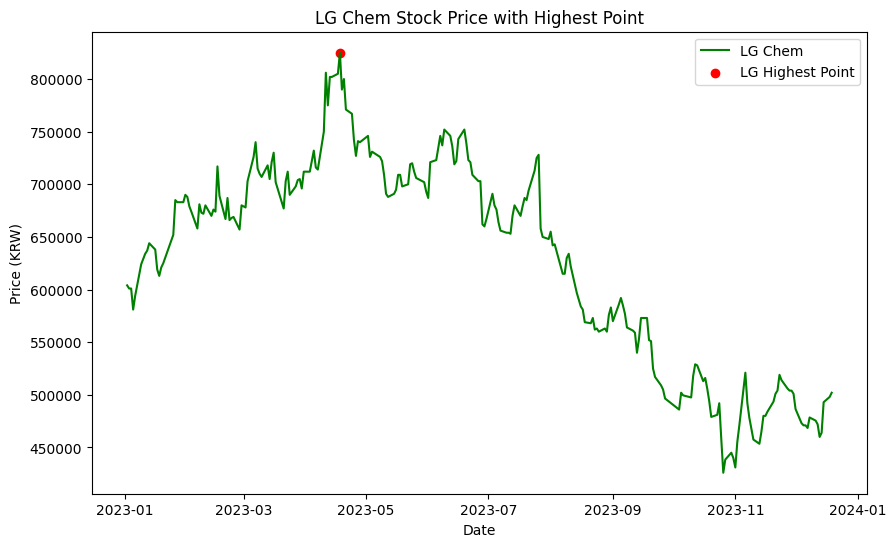


2023년 LG화학 최고점 - 날짜:  2023-04-18 00:00:00  금액:  825000.0


In [109]:
max_price_lg = LG['Close'].max()
max_date_lg = LG['Close'].idxmax()

plt.figure(figsize=(10, 6))

# LG화학 주식 가격 그래프(최고점 표시)
plt.plot(LG['Close'], label='LG Chem', color='green')
plt.scatter(max_date_lg, max_price_lg, color='red', label='LG Highest Point')
plt.title('LG Chem Stock Price with Highest Point')
plt.xlabel('Date')
plt.ylabel('Price (KRW)')
plt.legend()
plt.show()
print("\n2023년 LG화학 최고점 - 날짜: ", max_date_lg, " 금액: ", max_price_lg)

Samsung 최저점 - 날짜: 2023-01-03 00:00:00, 금액: 55400.0

SK Hynix 최저점 - 날짜: 2023-01-03 00:00:00, 금액: 75600.0

LG Chem 최저점 - 날짜: 2023-10-26 00:00:00, 금액: 426000.0



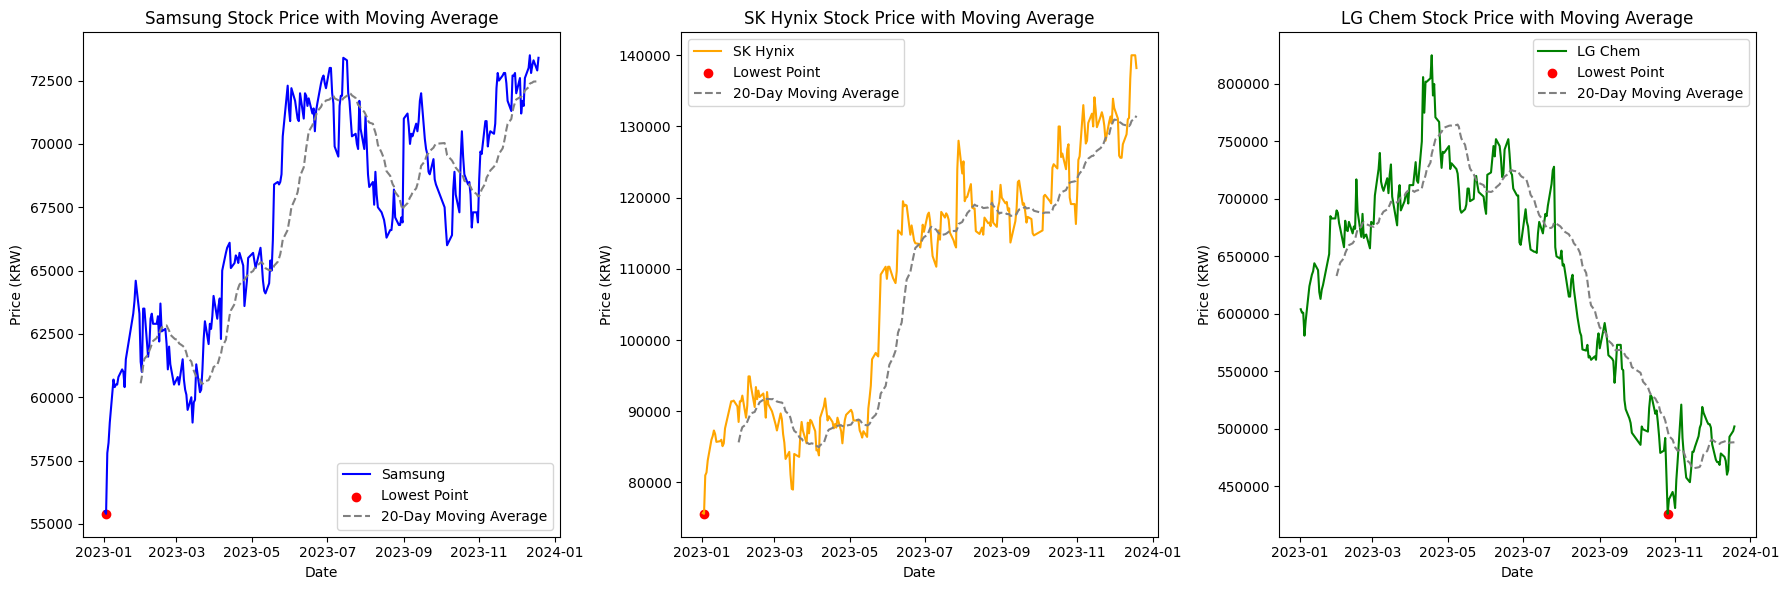

In [110]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

stocks = [SAMSUNG, SK, LG]
stock_names = ['Samsung', 'SK Hynix', 'LG Chem']
colors = ['blue', 'orange', 'green']

for ax, stock, name, color in zip(axs, stocks, stock_names, colors):
    # 최저점 찾기
    min_price = stock['Close'].min()
    min_date = stock['Close'].idxmin()

    # 이동평균선 추가 (20일 이동평균)
    stock['20MA'] = stock['Close'].rolling(window=20).mean()

    # 그래프 그리기
    ax.plot(stock['Close'], label=name, color=color)
    ax.scatter(min_date, min_price, color='red', label='Lowest Point')
    ax.plot(stock['20MA'], label='20-Day Moving Average', linestyle='--', color='gray')  # 이동평균선
    ax.set_title(f'{name} Stock Price with Moving Average')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price (KRW)')
    ax.legend()

    # 최저점 출력
    print(f"{name} 최저점 - 날짜: {min_date}, 금액: {min_price}")
    print()

plt.tight_layout()
plt.show()


# 이를 통해 현재 Samsung과 SK는 상승세, LG는 하락세를 파악할 수 있다.



---



## 보조지표를 이용하여\ 2023년 주가를 더 자세히 살펴보겠습니다.

In [111]:
!pip install ta



---


# ta 라이브러리를 이용하여 볼린저밴드 살펴보기

## **볼린저밴드란? **
볼린저 밴드는 주가의 변동성을 측정하고 가격의 상대적인 높낮이를 파악하는 데 사용되는 기술적 지표입니다.

주식 가격 차트 위에 상한선과 하한선을 표시하여 주가의 이동평균을 중심으로 가격의 상대적인 높낮이를 시각화합니다.


상한선 (상단 밴드): 중심 이동평균선에 상대적으로 표준편차를 더한 값으로 계산됩니다. 일반적으로 중심 이동평균선에 2배의 표준편차를 더한 값을 사용합니다.

하한선 (하단 밴드): 중심 이동평균선에 상대적으로 표준편차를 뺀 값으로 계산됩니다. 일반적으로 중심 이동평균선에서 2배의 표준편차를 뺀 값을 사용합니다.

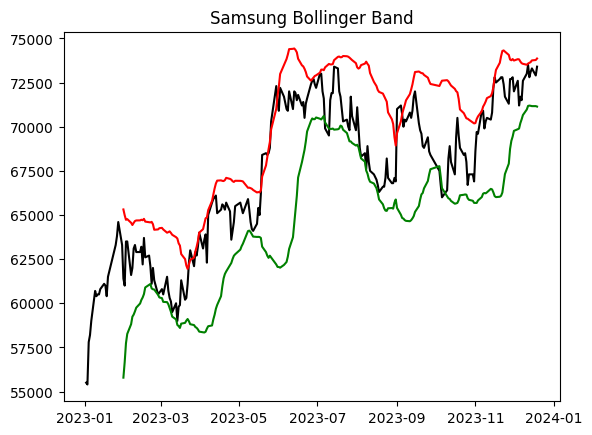

In [112]:
import ta
import matplotlib.pyplot as plt

bol_h = ta.volatility.bollinger_hband(SAMSUNG['Close'])
bol_l = ta.volatility.bollinger_lband(SAMSUNG['Close'])

plt.title('Samsung Bollinger Band')
plt.plot(SAMSUNG['Close'],c='k')
plt.plot(bol_h,c='r')
plt.plot(bol_l,c='g')

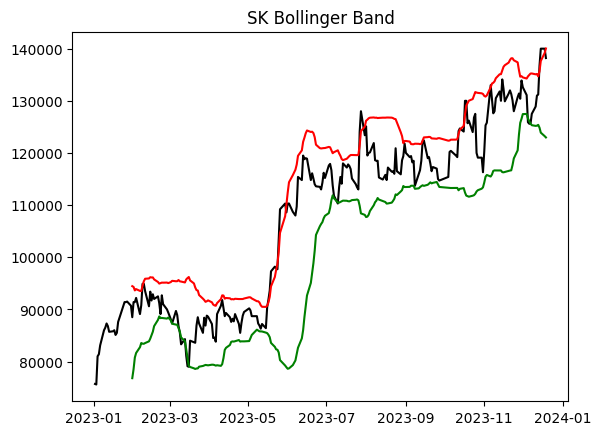

In [113]:
import ta
bol_h = ta.volatility.bollinger_hband(SK['Close'])
bol_l = ta.volatility.bollinger_lband(SK['Close'])

import matplotlib.pyplot as plt
plt.title('SK Bollinger Band')
plt.plot(SK['Close'],c='k')
plt.plot(bol_h,c='r')
plt.plot(bol_l,c='g')

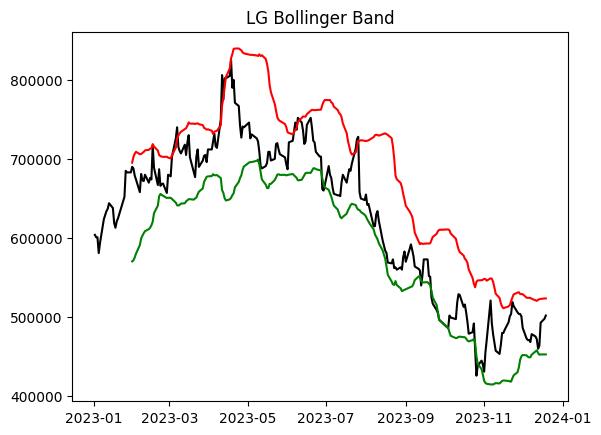

In [114]:
import ta
bol_h = ta.volatility.bollinger_hband(LG['Close'])
bol_l = ta.volatility.bollinger_lband(LG['Close'])

import matplotlib.pyplot as plt
plt.title('LG Bollinger Band')
plt.plot(LG['Close'],c='k')
plt.plot(bol_h,c='r')
plt.plot(bol_l,c='g')



---
# 그래프 자세히 살펴보기 (x 축 간격 조정)

# RSI 보조 지표 구하기

**RSI(상대강도지수)란,
기술적 지표 중 하나로서,
일정 기간 동안 주가의 상승압력과 하락압력 간의 상대적인 강도를 측정한다.

RSI는 주식의 가격 움직임이 과매수(Overbought) 또는 과매도(Oversold) 상태에 있는지를 파악하는데 도움을 줍니다. 주로 0에서 100 사이의 값으로 표시되며, 일반적으로 70 이상은 과매수 상태를, 30 이하는 과매도 상태를 나타냅니다.



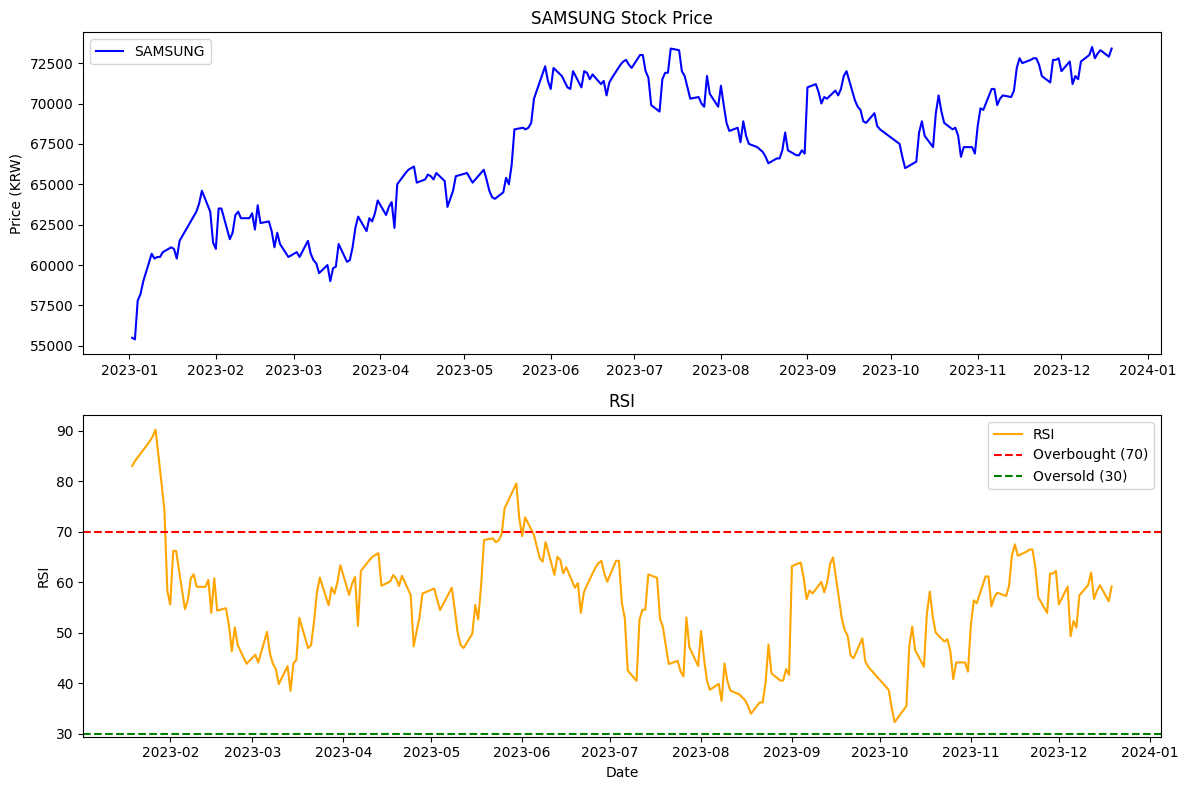

In [115]:
# 2023년 Samsung
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator
from ta import add_all_ta_features

# 보조 지표 추가
SAMSUNG = add_all_ta_features(SAMSUNG, open="Open", high="High", low="Low", close="Close", volume="Volume")

plt.figure(figsize=(12, 8))

# 주식 가격 그래프
plt.subplot(2, 1, 1)
plt.plot(SAMSUNG.index, SAMSUNG['Close'], label='SAMSUNG', color='blue')
plt.title('SAMSUNG Stock Price')
plt.ylabel('Price (KRW)')
plt.legend()

# RSI 그래프
plt.subplot(2, 1, 2)
plt.plot(SAMSUNG.index, SAMSUNG['momentum_rsi'], label='RSI', color='orange')
plt.axhline(y=70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='green', linestyle='--', label='Oversold (30)')
plt.title('RSI')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()

# x 축 간격 설정
for ax in plt.gcf().axes:
    ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(MonthLocator())

plt.tight_layout()
plt.show()


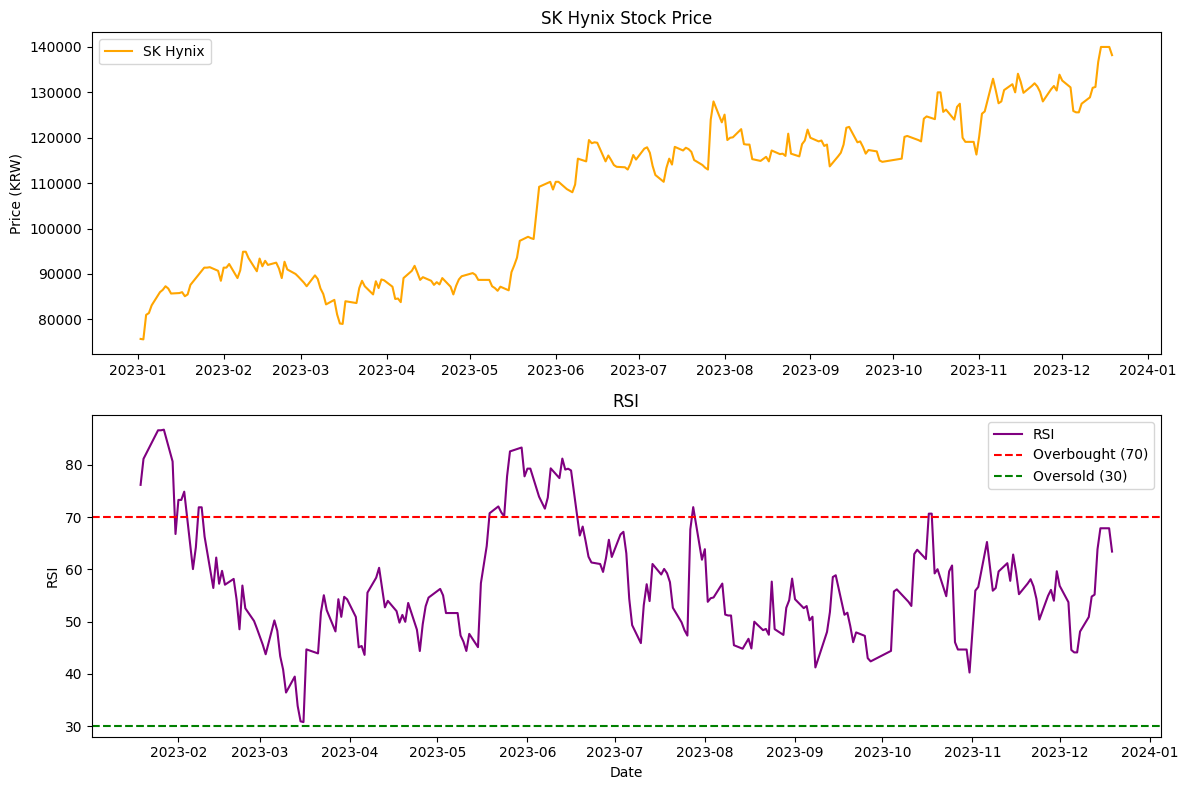

In [116]:
# 2023년 SK
SK = add_all_ta_features(SK, open="Open", high="High", low="Low", close="Close", volume="Volume")

plt.figure(figsize=(12, 8))

# 주식 가격 그래프 - SK
plt.subplot(2, 1, 1)
plt.plot(SK.index, SK['Close'], label='SK Hynix', color='orange')
plt.title('SK Hynix Stock Price')
plt.ylabel('Price (KRW)')
plt.legend()

# RSI 그래프 - SK
plt.subplot(2, 1, 2)
plt.plot(SK.index, SK['momentum_rsi'], label='RSI', color='purple')
plt.axhline(y=70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='green', linestyle='--', label='Oversold (30)')
plt.title('RSI')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()

# x 축 간격 설정 - SK
for ax in plt.gcf().axes:
    ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(MonthLocator())

plt.tight_layout()
plt.show()


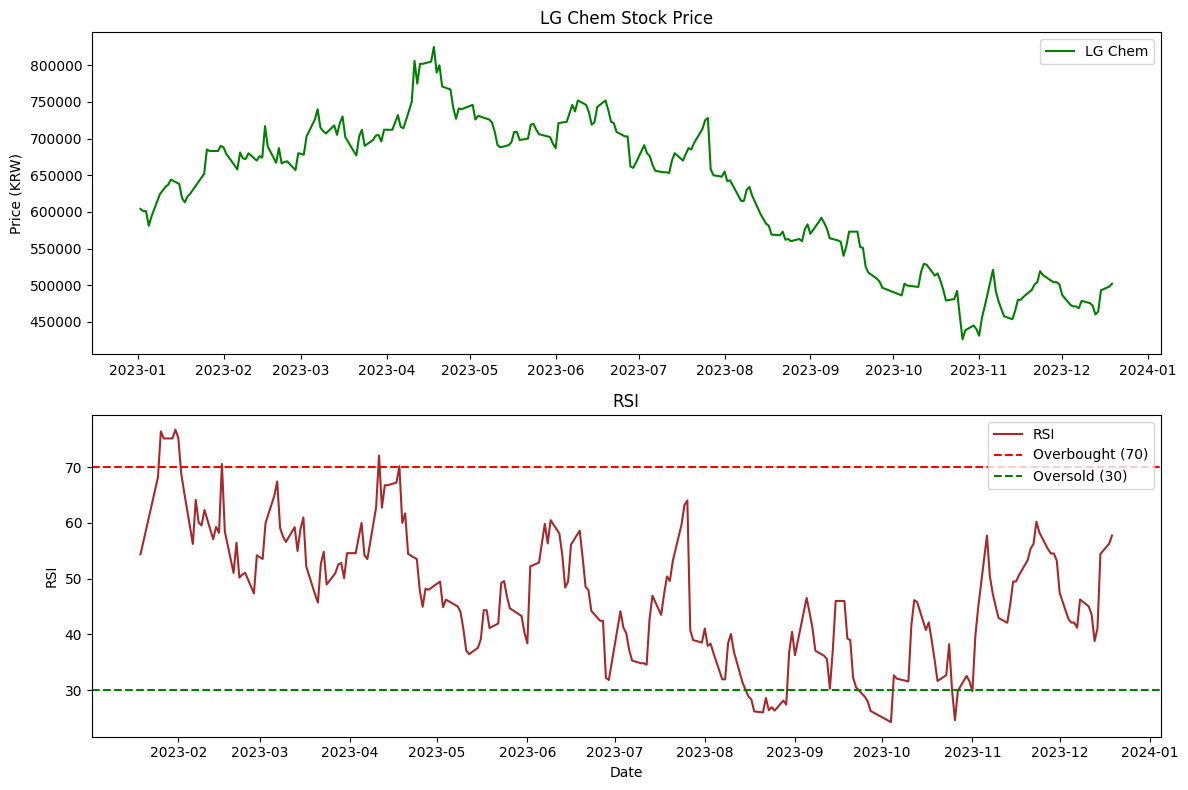

In [117]:
# 2023년 LG chem
LG = add_all_ta_features(LG, open="Open", high="High", low="Low", close="Close", volume="Volume")

plt.figure(figsize=(12, 8))

# 주식 가격 그래프 - LG
plt.subplot(2, 1, 1)
plt.plot(LG.index, LG['Close'], label='LG Chem', color='green')
plt.title('LG Chem Stock Price')
plt.ylabel('Price (KRW)')
plt.legend()

# RSI 그래프 - LG
plt.subplot(2, 1, 2)
plt.plot(LG.index, LG['momentum_rsi'], label='RSI', color='brown')
plt.axhline(y=70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='green', linestyle='--', label='Oversold (30)')
plt.title('RSI')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()

# x 축 간격 설정 - LG
for ax in plt.gcf().axes:
    ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(MonthLocator())

plt.tight_layout()
plt.show()

---

# 수익률 % 데이터(열 추가) 추가하기




In [118]:
# SAMSUNG, SK, LG 상승률 열 추가
SAMSUNG['수익률'] = SAMSUNG['Close'].pct_change() * 100
SK['수익률'] = SK['Close'].pct_change() * 100
LG['수익률'] = LG['Close'].pct_change() * 100


print("삼성\n")
SAMSUNG.iloc[0:5:1]


삼성



,Open,High,Low,Close,Adj Close,Volume,20MA,volume_adi,volume_obv,volume_cmf,...,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr,수익률
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-02,55500.0,56100.0,55200.0,55500.0,54906.453125,10031448,NaN,-3.343816e+06,10031448,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
2023-01-03,55400.0,56000.0,54500.0,55400.0,54807.519531,13547030,NaN,-6.344100e+05,-3515582,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.180180,-0.180343,-0.180180,-0.180180
2023-01-04,55700.0,58000.0,55600.0,57800.0,57181.851562,20188071,NaN,1.618898e+07,16672489,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.332130,4.240918,4.144144,4.332130
2023-01-05,58200.0,58800.0,57600.0,58200.0,57577.574219,15682826,NaN,1.618898e+07,32355315,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.692042,0.689658,4.864865,0.692042
2023-01-06,58300.0,59400.0,57900.0,59000.0,58369.019531,17334989,NaN,2.427864e+07,49690304,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.374570,1.365209,6.306306,1.374570


In [119]:
# SK 상승률 열 추가
print("\nSK\n")
SK.iloc[0:5:1]


SK



,Open,High,Low,Close,Adj Close,Volume,20MA,volume_adi,volume_obv,volume_cmf,...,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr,수익률
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-02,75100.0,76700.0,75000.0,75700.0,75240.664062,1376985,NaN,-2.429974e+05,1376985,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
2023-01-03,75600.0,76300.0,73100.0,75600.0,75141.265625,2719437,NaN,1.286686e+06,-1342452,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.132100,-0.132188,-0.132100,-0.132100
2023-01-04,75400.0,81900.0,75200.0,81000.0,80508.500000,5154609,NaN,5.056475e+06,3812157,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.142857,6.899287,7.001321,7.142857
2023-01-05,83300.0,83300.0,80800.0,81400.0,80906.070312,3510964,NaN,3.230773e+06,7323121,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.493827,0.492612,7.529723,0.493827
2023-01-06,81400.0,83600.0,81100.0,83100.0,82595.757812,3687430,NaN,5.443231e+06,11010551,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.088452,2.066943,9.775429,2.088452


In [120]:
# LG 상승률 열 추가
print("\nLG\n")
LG.iloc[0:5:1]


LG



,Open,High,Low,Close,Adj Close,Volume,20MA,volume_adi,volume_obv,volume_cmf,...,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr,수익률
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-02,596000.0,620000.0,596000.0,604000.0,604000.0,108253,NaN,-36084.333333,108253,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
2023-01-03,605000.0,610000.0,599000.0,601000.0,601000.0,112173,NaN,-107467.151515,-3920,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.496689,-0.497926,-0.496689,-0.496689
2023-01-04,594000.0,608000.0,586000.0,601000.0,601000.0,129672,NaN,-60313.696970,125752,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,-0.496689,0.000000
2023-01-05,603000.0,609000.0,580000.0,581000.0,581000.0,190445,NaN,-237624.559039,-64693,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-3.327787,-3.384418,-3.807947,-3.327787
2023-01-06,581000.0,598000.0,575000.0,594000.0,594000.0,135877,NaN,-149009.124256,71184,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.237522,2.212856,-1.655629,2.237522




---


# 사용하지 않는 columns(보조 지표들) 정리

In [121]:
SK.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', '20MA',
       'volume_adi', 'volume_obv', 'volume_cmf', 'volume_fi', 'volume_em',
       'volume_sma_em', 'volume_vpt', 'volume_vwap', 'volume_mfi',
       'volume_nvi', 'volatility_bbm', 'volatility_bbh', 'volatility_bbl',
       'volatility_bbw', 'volatility_bbp', 'volatility_bbhi',
       'volatility_bbli', 'volatility_kcc', 'volatility_kch', 'volatility_kcl',
       'volatility_kcw', 'volatility_kcp', 'volatility_kchi',
       'volatility_kcli', 'volatility_dcl', 'volatility_dch', 'volatility_dcm',
       'volatility_dcw', 'volatility_dcp', 'volatility_atr', 'volatility_ui',
       'trend_macd', 'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast',
       'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow',
       'trend_vortex_ind_pos', 'trend_vortex_ind_neg', 'trend_vortex_ind_diff',
       'trend_trix', 'trend_mass_index', 'trend_dpo', 'trend_kst',
       'trend_kst_sig', 'trend_kst_diff', 'trend_ichimoku_conv',

In [122]:
# columns_to_keep 제외한 나머지 열을 제거
columns_to_keep = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', '수익률']  # 남기고 싶은 열을 지정합니다. 여기서는 '수익률'만 남기고 나머지는 제거할 것입니다.

#Samsung
columns_to_drop = [col for col in SAMSUNG.columns if col not in columns_to_keep]
SAMSUNG = SAMSUNG.drop(columns=columns_to_drop, axis=1)

#SK
columns_to_drop = [col for col in SK.columns if col not in columns_to_keep]
SK = SK.drop(columns=columns_to_drop, axis=1)

#LG
columns_to_drop = [col for col in LG.columns if col not in columns_to_keep]
LG = LG.drop(columns=columns_to_drop, axis=1)

In [123]:
SAMSUNG

,Open,High,Low,Close,Adj Close,Volume,수익률
Date,,,,,,,
2023-01-02,55500.0,56100.0,55200.0,55500.0,54906.453125,10031448,NaN
2023-01-03,55400.0,56000.0,54500.0,55400.0,54807.519531,13547030,-0.180180
2023-01-04,55700.0,58000.0,55600.0,57800.0,57181.851562,20188071,4.332130
2023-01-05,58200.0,58800.0,57600.0,58200.0,57577.574219,15682826,0.692042
2023-01-06,58300.0,59400.0,57900.0,59000.0,58369.019531,17334989,1.374570
...,...,...,...,...,...,...,...
2023-12-13,73300.0,73500.0,72800.0,72800.0,72800.000000,13116766,-0.952381
2023-12-14,74100.0,74300.0,72500.0,73100.0,73100.000000,27567593,0.412088
2023-12-15,73800.0,74000.0,73200.0,73300.0,73300.000000,15419815,0.273598


In [124]:
SK

,Open,High,Low,Close,Adj Close,Volume,수익률
Date,,,,,,,
2023-01-02,75100.0,76700.0,75000.0,75700.0,75240.664062,1376985,NaN
2023-01-03,75600.0,76300.0,73100.0,75600.0,75141.265625,2719437,-0.132100
2023-01-04,75400.0,81900.0,75200.0,81000.0,80508.500000,5154609,7.142857
2023-01-05,83300.0,83300.0,80800.0,81400.0,80906.070312,3510964,0.493827
2023-01-06,81400.0,83600.0,81100.0,83100.0,82595.757812,3687430,2.088452
...,...,...,...,...,...,...,...
2023-12-13,130000.0,132400.0,130000.0,131200.0,131200.000000,2852873,0.152672
2023-12-14,133700.0,138300.0,133600.0,136700.0,136700.000000,8217135,4.192073
2023-12-15,137000.0,140000.0,137000.0,140000.0,140000.000000,5011719,2.414045


In [125]:
LG

,Open,High,Low,Close,Adj Close,Volume,수익률
Date,,,,,,,
2023-01-02,596000.0,620000.0,596000.0,604000.0,604000.0,108253,NaN
2023-01-03,605000.0,610000.0,599000.0,601000.0,601000.0,112173,-0.496689
2023-01-04,594000.0,608000.0,586000.0,601000.0,601000.0,129672,0.000000
2023-01-05,603000.0,609000.0,580000.0,581000.0,581000.0,190445,-3.327787
2023-01-06,581000.0,598000.0,575000.0,594000.0,594000.0,135877,2.237522
...,...,...,...,...,...,...,...
2023-12-13,467500.0,469000.0,458500.0,460000.0,460000.0,207659,-2.542373
2023-12-14,469000.0,471000.0,459500.0,464000.0,464000.0,375683,0.869565
2023-12-15,469500.0,496500.0,469000.0,493000.0,493000.0,615510,6.250000




---


# 수익률 첫 번째에 NaN 데이터를 처리(결측값 처리)

In [126]:
SAMSUNG = SAMSUNG.dropna(subset=['수익률'], axis=0)

SK = SK.dropna(subset=['수익률'], axis=0)

LG = LG.dropna(subset=['수익률'], axis=0)

In [127]:
SAMSUNG

,Open,High,Low,Close,Adj Close,Volume,수익률
Date,,,,,,,
2023-01-03,55400.0,56000.0,54500.0,55400.0,54807.519531,13547030,-0.180180
2023-01-04,55700.0,58000.0,55600.0,57800.0,57181.851562,20188071,4.332130
2023-01-05,58200.0,58800.0,57600.0,58200.0,57577.574219,15682826,0.692042
2023-01-06,58300.0,59400.0,57900.0,59000.0,58369.019531,17334989,1.374570
2023-01-09,59700.0,60700.0,59600.0,60700.0,60050.835938,18640107,2.881356
...,...,...,...,...,...,...,...
2023-12-13,73300.0,73500.0,72800.0,72800.0,72800.000000,13116766,-0.952381
2023-12-14,74100.0,74300.0,72500.0,73100.0,73100.000000,27567593,0.412088
2023-12-15,73800.0,74000.0,73200.0,73300.0,73300.000000,15419815,0.273598




---


# 50일 이동평균선, 200일 일동평균선 시각화

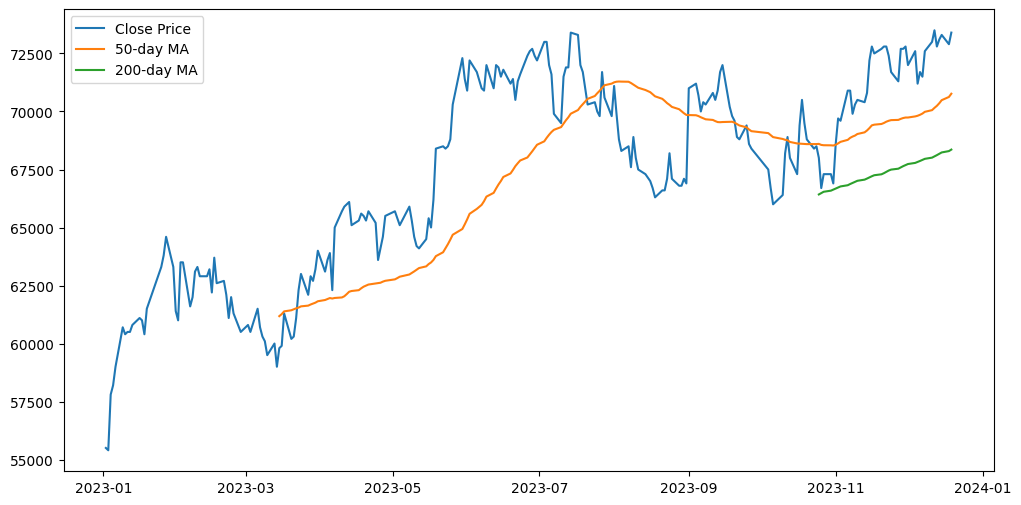

In [141]:
# 당기순이익(Earnings) 계산
SAMSUNG = SAMSUNG.copy()
SAMSUNG.loc[:, 'Earnings'] = SAMSUNG['Close'].pct_change()
SAMSUNG.loc[:, 'MA50'] = SAMSUNG['Close'].rolling(window=50).mean()
SAMSUNG.loc[:, 'MA200'] = SAMSUNG['Close'].rolling(window=200).mean()
# 시각화를 통해 데이터 확인
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(SAMSUNG['Close'], label='Close Price')
plt.plot(SAMSUNG['MA50'], label='50-day MA')
plt.plot(SAMSUNG['MA200'], label='200-day MA')
plt.legend()
plt.show()


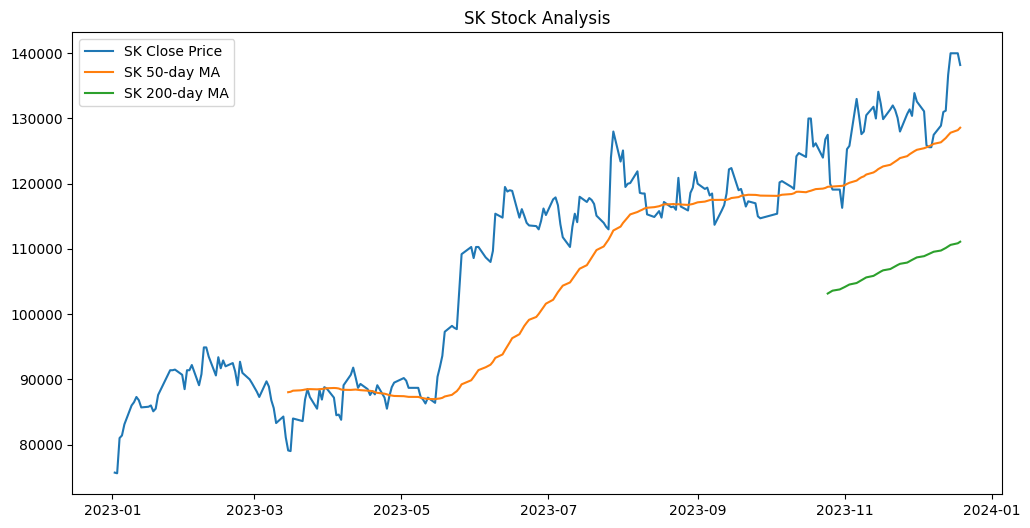

In [142]:
SK = SK.copy()

SK.loc[:, 'Earnings'] = SK['Close'].pct_change()

# SK 이동평균 계산
SK.loc[:, 'MA50'] = SK['Close'].rolling(window=50).mean()
SK.loc[:, 'MA200'] = SK['Close'].rolling(window=200).mean()

# SK 주가와 이동평균 시각화
plt.figure(figsize=(12, 6))
plt.plot(SK['Close'], label='SK Close Price')
plt.plot(SK['MA50'], label='SK 50-day MA')
plt.plot(SK['MA200'], label='SK 200-day MA')
plt.legend()
plt.title('SK Stock Analysis')
plt.show()

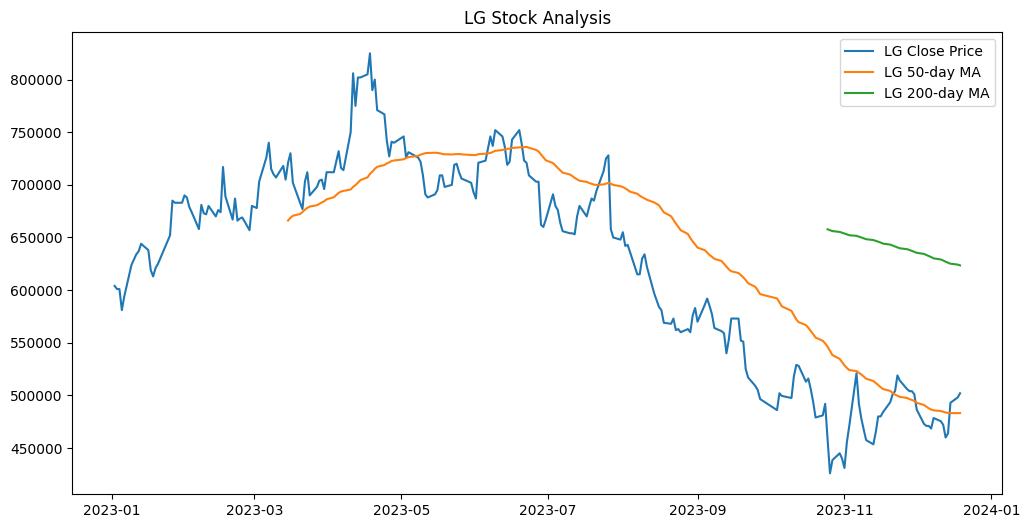

In [145]:
LG = LG.copy()

LG.loc[:, 'Earnings'] = LG['Close'].pct_change()

# LG 이동평균 계산
LG.loc[:, 'MA50'] = LG['Close'].rolling(window=50).mean()
LG.loc[:, 'MA200'] = LG['Close'].rolling(window=200).mean()

# 이동평균 시각화
plt.figure(figsize=(12, 6))
plt.plot(LG['Close'], label='LG Close Price')
plt.plot(LG['MA50'], label='LG 50-day MA')
plt.plot(LG['MA200'], label='LG 200-day MA')
plt.legend()
plt.title('LG Stock Analysis')
plt.show()

In [150]:
from scipy.stats import ttest_ind

# 각 주식의 당기순이익(Earnings) 계산
SAMSUNG['Earnings'] = SAMSUNG['Close'].pct_change().dropna()
SK['Earnings'] = SK['Close'].pct_change().dropna()
LG['Earnings'] = LG['Close'].pct_change().dropna()

# t-검정을 통한 분석
_, p_value_samsung_sk = ttest_ind(SAMSUNG['Earnings'], SK['Earnings'], equal_var=False)
_, p_value_samsung_lg = ttest_ind(SAMSUNG['Earnings'], LG['Earnings'], equal_var=False)
_, p_value_sk_lg = ttest_ind(SK['Earnings'], LG['Earnings'], equal_var=False)

# 유의수준 설정
alpha = 0.05

# 결과 출력
if p_value_samsung_sk < alpha:
    print("삼성전자와 SK 주식의 수익률은 차이가 있음")
else:
    print("삼성전자와 SK 주식의 수익률은 차이가 없음")

if p_value_samsung_lg < alpha:
    print("삼성전자와 LG 주식의 수익률은 차이가 있음")
else:
    print("삼성전자와 LG 주식의 수익률은 차이가 없음")

if p_value_sk_lg < alpha:
    print("SK와 LG 주식의 수익률은 차이가 있음")
else:
    print("SK와 LG 주식의 수익률은 차이가 없음")


삼성전자와 SK 주식의 수익률은 차이가 없음
삼성전자와 LG 주식의 수익률은 차이가 없음
SK와 LG 주식의 수익률은 차이가 없음


Samsung, SK, LG 수익률이 차이가 없다.?


주가의 수익률이 통계적으로 유의미한 차이를 보이지 않는다.


 t-검정은 주어진 데이터에 기반해 "두 집단 간의 평균에 차이가 있는지"를 확인하는데, 결과가 유의하지 않다면 두 그룹 간에는 통계적으로 유의미한 차이가 없다는 것을 의미한다.


이 코드의 t-검정은 삼성전자, SK, LG 주식의 수익률 간의 차이를 검정하는데, 아래의 문제들로 틀린 경우가 발생할 수 있다.

 - 데이터 변동성: 주가의 변동성이 매우 높거나 데이터 포인트가 적을 경우.

 - 유사한 동향: 세 가지 주식 모두 비슷한 추이를 보여 차이가 특별히 크지 않는 경우.

 - 검정력의 한계: 검정력의 한계로 인해 유의미한 결과를 얻지 못하는 경우.

 - 데이터 전처리: 데이터 처리 과정에서 특이점이 발생했을 경우.

# 결론: Samsung, SK, LG 다 좋은 주식이다.



---

# 간단한 선형 회귀 분석을 통한 주식 가격 예측 모델

In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

SAMSUNG['Next_Close'] = SAMSUNG['Close'].shift(-1)


SAMSUNG.dropna(inplace=True)
X = SAMSUNG[['Open', 'High', 'Low', 'Volume']]
#예측값
y = SAMSUNG['Next_Close']

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터
predictions = model.predict(X_test)

# 성능 측정
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Samsung 주식 Mean Squared Error: {mse}")
print(f"\n\nSamsung 주식 R^2 Score: {r2}")

# 예측
next_day_data = np.array([SAMSUNG.iloc[-1][['Open', 'High', 'Low', 'Volume']]])
next_day_prediction = model.predict(next_day_data)
print(f"\n\n다음 날 Samsung 주식 종가 예측: {next_day_prediction}")

Samsung 주식 Mean Squared Error: 371918.2648002743


Samsung 주식 R^2 Score: 0.8597113871207782


다음 날 Samsung 주식 종가 예측: [72853.05140052]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [148]:
# SK 주식 데이터를 활용한 예측
SK['Next_Close'] = SK['Close'].shift(-1)


SK.dropna(inplace=True)
X_SK = SK[['Open', 'High', 'Low', 'Volume']]
y_SK = SK['Next_Close']


X_train_SK, X_test_SK, y_train_SK, y_test_SK = train_test_split(X_SK, y_SK, test_size=0.2, random_state=42)

model_SK = LinearRegression()
model_SK.fit(X_train_SK, y_train_SK)

predictions_SK = model_SK.predict(X_test_SK)

mse_SK = mean_squared_error(y_test_SK, predictions_SK)
r2_SK = r2_score(y_test_SK, predictions_SK)

print(f"SK 주식 Mean Squared Error: {mse_SK}")
print(f"\n\nSK 주식 R^2 Score: {r2_SK}")

next_day_data_SK = np.array([SK.iloc[-1][['Open', 'High', 'Low', 'Volume']]])  # 다음 날의 데이터
next_day_prediction_SK = model_SK.predict(next_day_data_SK)
print(f"\n\n다음 날 SK 주식 종가 예측: {next_day_prediction_SK}")


SK 주식 Mean Squared Error: 7288054.271053619


SK 주식 R^2 Score: 0.7554754480438309


다음 날 SK 주식 종가 예측: [139528.18518288]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [149]:
# LG 주식 데이터를 활용한 예측

LG['Next_Close'] = LG['Close'].shift(-1)

LG.dropna(inplace=True)
X_LG = LG[['Open', 'High', 'Low', 'Volume']]
y_LG = LG['Next_Close']

X_train_LG, X_test_LG, y_train_LG, y_test_LG = train_test_split(X_LG, y_LG, test_size=0.2, random_state=42)


model_LG = LinearRegression()
model_LG.fit(X_train_LG, y_train_LG)

predictions_LG = model_LG.predict(X_test_LG)

mse_LG = mean_squared_error(y_test_LG, predictions_LG)
r2_LG = r2_score(y_test_LG, predictions_LG)

print(f"LG 주식 Mean Squared Error: {mse_LG}")
print(f"\n\nLG 주식 R^2 Score: {r2_LG}")


next_day_data_LG = np.array([LG.iloc[-1][['Open', 'High', 'Low', 'Volume']]])  # 다음 날의 데이터
next_day_prediction_LG = model_LG.predict(next_day_data_LG)
print(f"\n\n다음 날 LG 주식 종가 예측: {next_day_prediction_LG}")


LG 주식 Mean Squared Error: 284494324.26338905


LG 주식 R^2 Score: 0.03704057791110116


다음 날 LG 주식 종가 예측: [503341.95162908]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(




---
# 마무리


주식 투자에 대한 데이터 분석을 통해, 배당주를 제공하는 주식을 중심으로 삼아 Samsung, SK, LG의 주식을 분석해보았습니다.

주식 시장에서 배당주를 제공하는 기업은 안정적이고 장기적인 투자를 고려할 때 중요한 고려 요소 중 하나이다.

분석 결과, 세 기업 중 SK 주식은 평균 제곱 오차(Mean Squared Error)가 매우 낮고 결정 계수(R^2 Score)가 높았다.

이는 모델이 예측한 값들이 실제 값들과 꽤 잘 일치한다는 것을 의미한다.

더불어, 세 종목의 주식 종가 예측 값도 얻을 수 있었습니다.